In [23]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create connection to sql server
moviesDB = mysql.connector.connect(
    host='127.0.0.1',
    user="root",
    password="We@84kjqund",
    database="movies",
    auth_plugin='mysql_native_password'
)

print(moviesDB) # Proof coneection was established

### Table of Movies

In [3]:
mycur = moviesDB.cursor()

mycur.execute("SELECT * FROM movie") # sql statement to retrieve data from the list of movies table

mymovies = mycur.fetchall()

movie_df = pd.DataFrame(mymovies, columns =['m_ID','Name', 'Length', 'Rate'])
movie_df

,m_ID,Name,Length,Rate
0,1,Avengers: Infinity Wars,160,PG-13
1,2,Bird Box,124,R
2,3,Incredibles 2,125,PG
3,4,Aquaman,125,PG
4,5,A Quiet Place,142,PG
5,6,Deadpool,169,R


### Table of Reviewers 

In [4]:
mycur.execute("SELECT * FROM reviewers") # retrieve data from reviewers table
myreviewers = mycur.fetchall()

reviewers_df = pd.DataFrame(myreviewers, columns =['r_ID','Name', 'Age', 'Gender'])
reviewers_df

,r_ID,Name,Age,Gender
0,1,Jan,38,f
1,2,Zo,28,m
2,3,Malachi,7,m
3,4,Dowren,56,f
4,5,Adrian,55,m
5,6,Javern,27,f
6,7,Camz,27,f
7,8,Wendy,28,f
8,9,Reece,34,f
9,10,Soriya,12,f


### Table of Scores

In [7]:
mycur.execute("SELECT * FROM scores") # retrieve data from the scores table
myscores = mycur.fetchall()

scores_df = pd.DataFrame(myscores, columns =['m_ID','r_ID', 'Score'])
scores_df.head()

,m_ID,r_ID,Score
0,4,3,4.0
1,1,6,5.0
2,3,6,5.0
3,5,2,3.0
4,6,7,4.0


### Integrate all data into one

Use of SQL statements via Python to change the name of some columns. Python statements were used for the others

In [13]:
sql = "SELECT \
Movie.item AS Title, Movie.length_mins, Movie.rate, \
Reviewers.reviewer AS Participants, Reviewers.age, Reviewers.gender, \
Scores.score AS Score FROM Movie \
INNER JOIN Scores ON Movie.m_ID = Scores.m_ID \
INNER JOIN Reviewers on Scores.r_ID = Reviewers.r_ID"

mycur.execute(sql)
mydata = mycur.fetchall()

my_df = pd.DataFrame(mydata, columns = ['Title', 'Length', 'Rate', 'Participants', 'Age', 'Gender', 'Score'])
my_df.head(20)

,Title,Length,Rate,Participants,Age,Gender,Score
0,Avengers: Infinity Wars,160,PG-13,Javern,27,f,5.0
1,Avengers: Infinity Wars,160,PG-13,Adrian,55,m,NaN
2,Avengers: Infinity Wars,160,PG-13,Jan,38,f,NaN
3,Avengers: Infinity Wars,160,PG-13,Zo,28,m,4.0
4,Avengers: Infinity Wars,160,PG-13,Malachi,7,m,5.0
5,Avengers: Infinity Wars,160,PG-13,Dowren,56,f,2.0
6,Avengers: Infinity Wars,160,PG-13,Camz,27,f,5.0
7,Avengers: Infinity Wars,160,PG-13,Wendy,28,f,5.0
8,Avengers: Infinity Wars,160,PG-13,Reece,34,f,3.0
9,Avengers: Infinity Wars,160,PG-13,Soriya,12,f,4.0


In [15]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
Title           60 non-null object
Length          60 non-null int64
Rate            60 non-null object
Participants    60 non-null object
Age             60 non-null int64
Gender          60 non-null object
Score           45 non-null float64
dtypes: float64(1), int64(2), object(4)
memory usage: 3.4+ KB


In [16]:
my_df.describe()

,Length,Age,Score
count,60.000000,60.000000,45.000000
mean,140.833333,31.100000,3.866667
std,18.165125,15.112796,1.140175
min,124.000000,7.000000,2.000000
25%,125.000000,27.000000,3.000000
50%,133.500000,28.000000,4.000000
75%,160.000000,38.000000,5.000000
max,169.000000,56.000000,5.000000


### Average Score per person

In [21]:
my_df[['Participants', 'Score']].groupby(['Participants']).mean()

,Score
Participants,
Adrian,3.000000
Camz,4.166667
Dowren,2.333333
Jan,5.000000
Javern,4.666667
Malachi,4.666667
Reece,2.666667
Soriya,4.750000
Wendy,3.714286


### Counts of each score

Text(0.5, 0, 'Score')

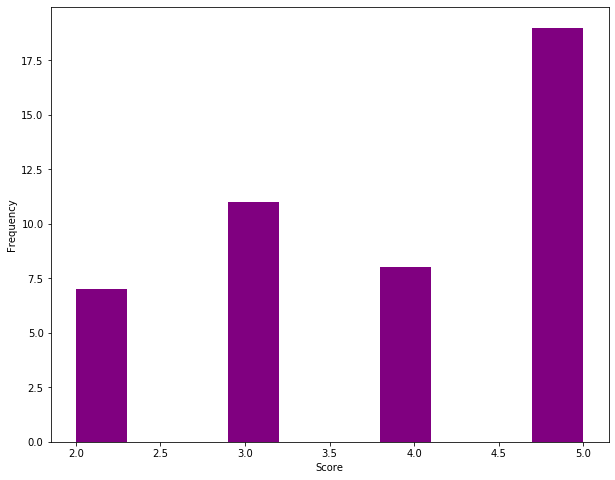

In [33]:
plt.figure(figsize=[10,8])
plt.hist(my_df['Score'], color = 'purple')
plt.ylabel('Frequency')
plt.xlabel('Score')

### Number of Movies watched per person

<BarContainer object of 10 artists>

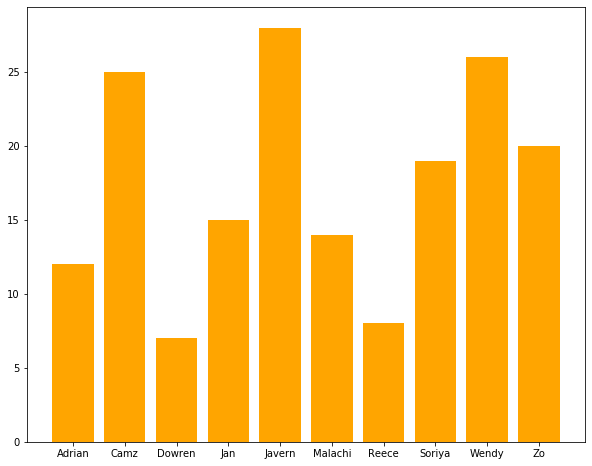

In [45]:
plt.figure(figsize=[10,8])
sum_updf = my_df[['Participants', 'Score']].groupby(['Participants'], as_index = False).sum() #shift participants from index
persons = sum_updf['Participants']
scores = sum_updf['Score']
plt.bar(persons, scores, color = 'orange')

All movies listed are current. Dowren, Adrian and Reece watched the least amount of movies. Dowren and Adrian are the oldest and therefore current movies are not within their interests. Reece on the other hand stated that the movies listed are not her type to watch. Malachi has the second lowest as he is the youngest and is limited to movies rated PG or maybe PG-13. Javern, Camz and Wendy watched all movies.